In [2]:
import numpy as np
import xarray as xr
import glob
from datetime import timedelta

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
outdir='/work/jet/data/interim/'
dset = 'thetaob_onshlf' # sab_onshlf, thetaob_onshlf
var = 'bottom_thetao' # bottom_sa, bottom_thetao

In [4]:
ddict = {mod:{} for mod in ['CM4_c192_OM4p25','CM4_c192_OM4p125']}
ddict_exp = {exp:{} for exp in ['piControl_v7','piControl_v8','historical','ssp585']}

for i, mod in enumerate(ddict):
    for j, exp in enumerate(ddict_exp):
        
        if exp.split('_')[0]=='piControl':
            head = 'CM4_%s_c192_%s_%s'%(exp.split('_')[0],mod.split('_')[-1],exp.split('_')[1])
        else:
            head = 'CM4_%s_c192_%s'%(exp,mod.split('_')[-1])
            
        print(head)
        
        files = glob.glob(outdir+head+'_*_'+dset+'.nc')
        if len(files)>1:
            print('WARNING: More than one file for '+dset+' in '+head)
        elif len(files)==0:
            print('ERROR: No file available for '+dset+' in '+head)
            ddict_exp[exp] = []
            continue
            
        print('Loading '+files[0])
        da = xr.open_dataset(files[0])[var]
        
        if exp.split('_')[0]=='piControl':
            yr_st_cntr = 101
            yr_st_hist = 1850
            nyrs_shift = yr_st_hist-yr_st_cntr
            print('Shift time axis by',nyrs_shift,'years')
            da['time'] = da.time + timedelta(days=365*nyrs_shift)
        
        ddict_exp[exp] = da

    #print(mod)
    #ddict[mod] = ddict_exp
    ddict[mod] = ddict_exp.copy()

CM4_piControl_c192_OM4p25_v7
Loading /work/jet/data/interim/CM4_piControl_c192_OM4p25_v7_0001to0350_thetaob_onshlf.nc
Shift time axis by 1749 years
CM4_piControl_c192_OM4p25_v8
Loading /work/jet/data/interim/CM4_piControl_c192_OM4p25_v8_0101to0350_thetaob_onshlf.nc
Shift time axis by 1749 years
CM4_historical_c192_OM4p25
Loading /work/jet/data/interim/CM4_historical_c192_OM4p25_1850to2009_thetaob_onshlf.nc
CM4_ssp585_c192_OM4p25
Loading /work/jet/data/interim/CM4_ssp585_c192_OM4p25_2010to2099_thetaob_onshlf.nc
CM4_piControl_c192_OM4p125_v7
Loading /work/jet/data/interim/CM4_piControl_c192_OM4p125_v7_0001to0350_thetaob_onshlf.nc
Shift time axis by 1749 years
CM4_piControl_c192_OM4p125_v8
ERROR: No file available for thetaob_onshlf in CM4_piControl_c192_OM4p125_v8
CM4_historical_c192_OM4p125
Loading /work/jet/data/interim/CM4_historical_c192_OM4p125_1850to1979_thetaob_onshlf.nc
CM4_ssp585_c192_OM4p125
ERROR: No file available for thetaob_onshlf in CM4_ssp585_c192_OM4p125


In [5]:
lstr = [['CM4X-p25 piControl (v7)', 'CM4X-p25 piControl (v8)', 'CM4X-p25 hist', 'CM4X-p25 SSP5-8.5'],
        ['CM4X-p125 piControl (v7)', 'CM4X-p125 piControl (v8)', 'CM4X-p125 hist', 'CM4X-p125 SSP5-8.5']]
lstrc = ['CM4X-p25 hist+SSP5-8.5','CM4X-p125 hist+SSP5-8.5']
cstr = [['g', 'g', 'darkslategrey', 'k'],['b', 'b', 'brown', 'darkred']]
cstrc = ['k','brown']

In [6]:
psi_p25_piControl = xr.concat([ddict['CM4_c192_OM4p25']['piControl_v7'].sel(time=slice(None, '1849')), ddict['CM4_c192_OM4p25']['piControl_v8']], dim='time')
psi_p25_hist_ssp = xr.concat([ddict['CM4_c192_OM4p25']['historical'], ddict['CM4_c192_OM4p25']['ssp585']], dim='time')
psi_p125_piControl = ddict['CM4_c192_OM4p125']['piControl_v7']
psi_p125_hist_ssp = ddict['CM4_c192_OM4p125']['historical']

In [7]:
from mplsettings import setup_plots
setup_plots()

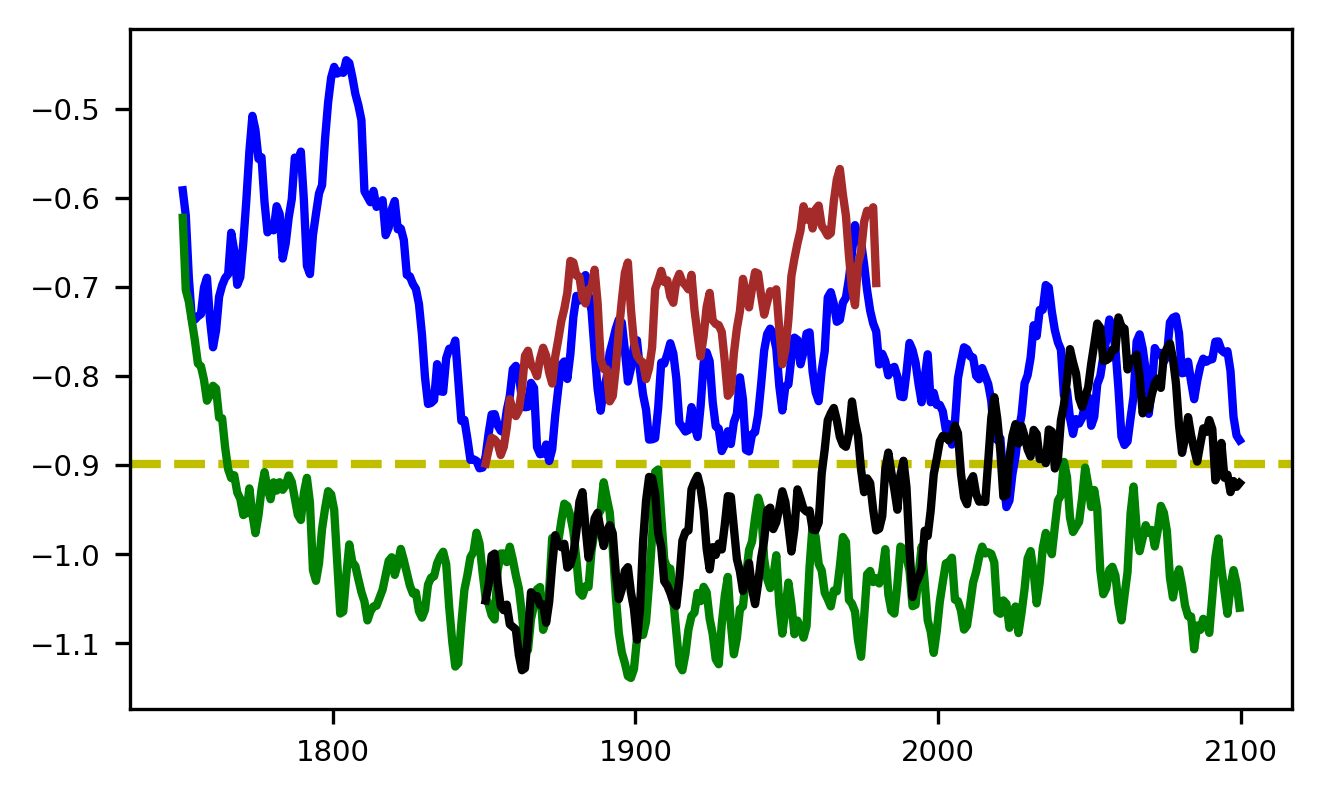

In [8]:
fig, ax = plt.subplots(figsize=(5,3))
line = ax.axhline(y=-0.899198, xmin=0, xmax=1, c = 'y', lw=2.0, ls='--', label=None) # ct
psi_p125_piControl.plot(ax=ax,lw=2,c='b',_labels=False)
psi_p25_piControl.plot(ax=ax,lw=2,c='g',_labels=False)
psi_p125_hist_ssp.plot(ax=ax,lw=2,c='brown',_labels=False)
psi_p25_hist_ssp.plot(ax=ax,lw=2,c='k',_labels=False)
plt.show()

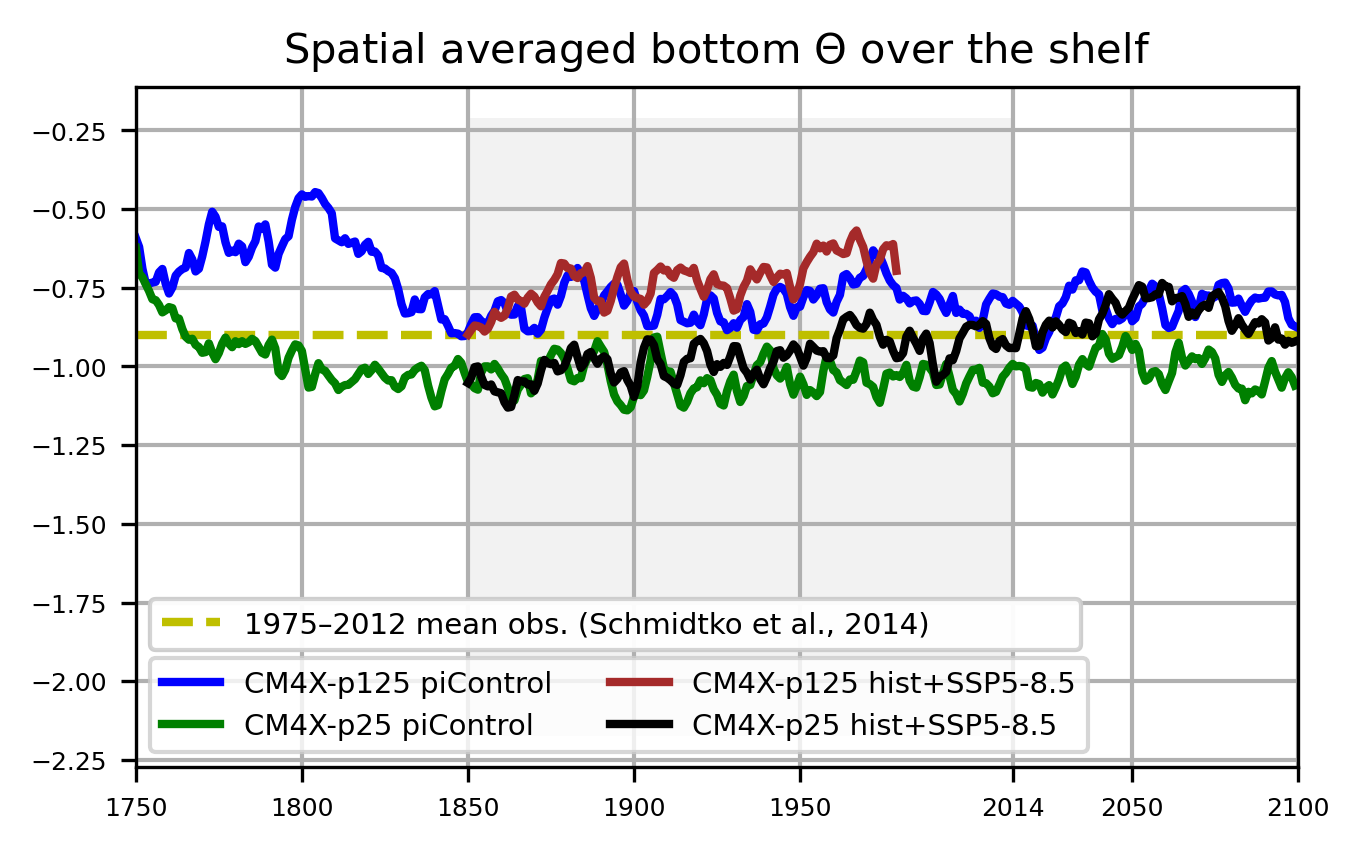

In [9]:
fig, ax = plt.subplots(figsize=(5,3))

#line = ax.axhline(y=34.7570097, xmin=0, xmax=1, c = 'y', lw=2.0, ls='--', label=None) # sa
line = ax.axhline(y=-0.899198, xmin=0, xmax=1, c = 'y', lw=2.0, ls='--', label=None) # ct
psi_p125_piControl.groupby('time.year').mean('time').plot(ax=ax,lw=2,c='b',_labels=False,label='CM4X-p125 piControl')
psi_p25_piControl.groupby('time.year').mean('time').plot(ax=ax,lw=2,c='g',_labels=False,label='CM4X-p25 piControl')
psi_p125_hist_ssp.groupby('time.year').mean('time').plot(ax=ax,lw=2,c='brown',_labels=False,label='CM4X-p125 hist+SSP5-8.5')
psi_p25_hist_ssp.groupby('time.year').mean('time').plot(ax=ax,lw=2,c='k',_labels=False,label='CM4X-p25 hist+SSP5-8.5')

ax.set_xlim(1750,2100)
ax.set_xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100])
#ax.set_yticks(np.arange(34.2,34.9,0.1))
#ax.set_yticks(np.arange(34.2,34.87,0.02), minor=True)
#ax.set_ylim([34.2, 34.87])
#ax.set_ylabel('g kg$^{-1}$',fontsize=10)
#ax.set_xlabel('year')
ax.grid(linewidth=1)
ax.tick_params(axis='both', which='major', labelsize=6)

# Create the main legend for the other lines
lgnd_main = ax.legend(frameon=True, fancybox=True, loc='lower left', ncol=2, fontsize=7)

# Create a custom legend for the horizontal line
lgnd_expand = plt.legend(handles=[line, plt.Line2D([0], [0], color='none')], 
                         labels=['1975–2012 mean obs. (Schmidtko et al., 2014)', ''], 
                         loc='lower left', bbox_to_anchor=(0, 0.15), ncol=2, fontsize=7, handlelength=2, frameon=True)

# Add the custom legend manually
ax.add_artist(lgnd_expand)

# Add the main legend back
ax.add_artist(lgnd_main)
#ax.set_title('Spatial averaged bottom $S_{A}$ over the shelf', fontsize=10)
ax.set_title('Spatial averaged bottom $\Theta$ over the shelf', fontsize=10)
ylimit = ax.get_ylim()
ax.fill([1850,2014,2014,1850],[ylimit[0]-1,ylimit[0]-1,ylimit[1]+0.2,ylimit[1]+0.2],'grey', alpha=0.1, edgecolor='None')

#plt.savefig('/work/jet/figure.png', dpi=None, facecolor='w', edgecolor='w',
#            orientation='portrait', format='png',transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show()

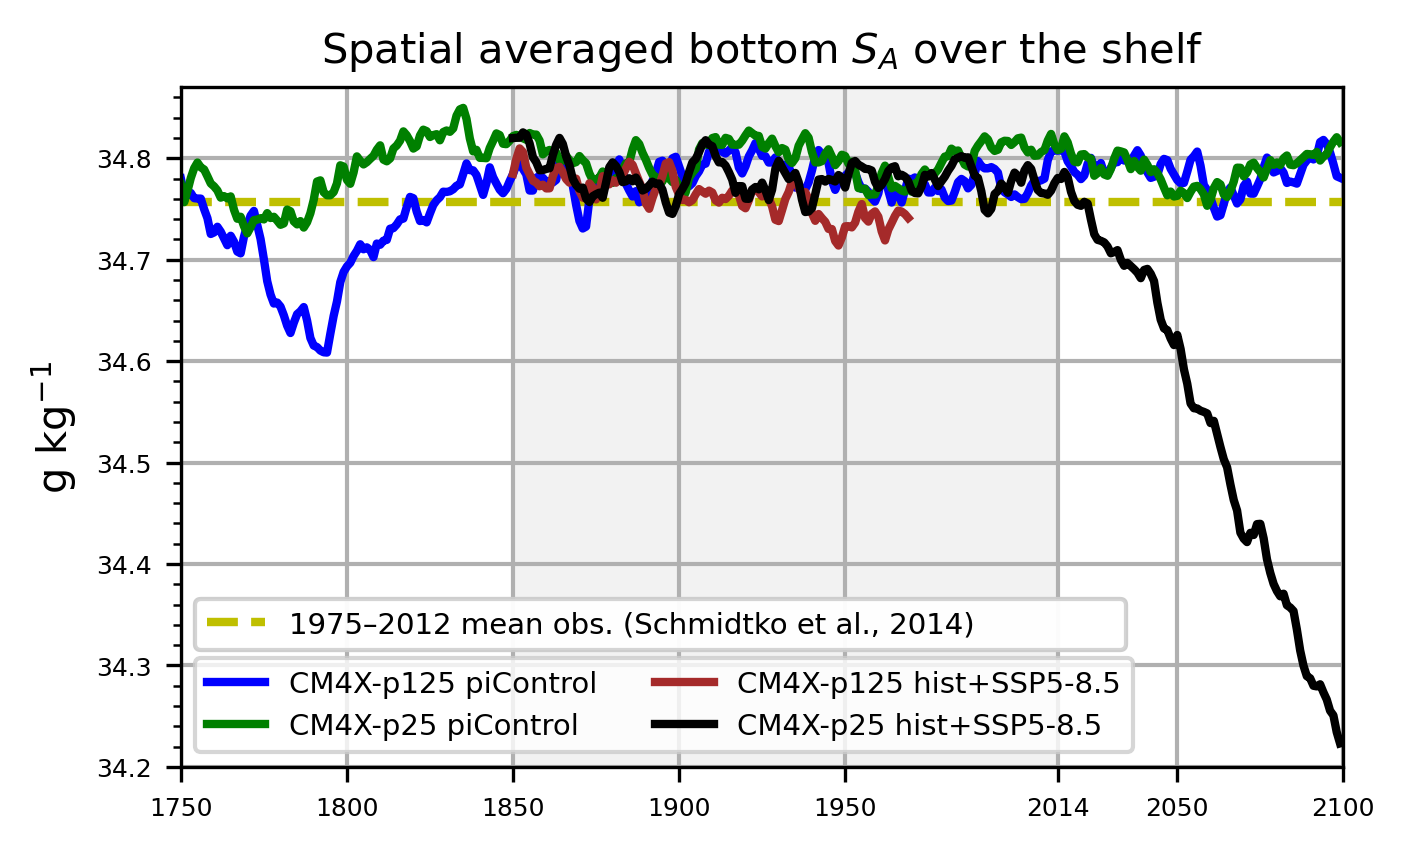